In [2]:
import pandas as pd


train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
train_data

,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1,Y2
0,0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,-0.935902,-0.310081
1,1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,-0.089707,-0.305374
2,2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,-0.077855,-0.631485
3,3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,0.941271,-0.535212
4,4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,-0.039582,-0.490561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,80000,-0.339802,-0.372094,-0.120952,-0.363438,0.266299,-0.222866,-0.000358,0.470755,-0.412086,-0.332426,-0.374358,-0.251086,-0.058820,0.312828,-0.564065,-0.154864
79996,80001,-0.421921,-0.222554,-0.689585,-0.512266,-0.206562,-0.494450,-0.197705,-0.566908,-0.570731,-1.093729,-0.382964,-0.249580,-0.446410,-0.527049,0.031323,-0.474736
79997,80002,-0.467038,-0.282018,0.010707,-0.589594,0.067635,-0.410820,0.032695,-0.506164,-0.513340,-0.871582,-0.345584,-0.402364,-0.372984,-0.419894,-0.213572,-0.503083
79998,80003,-0.369710,-0.322384,-0.540326,-0.563206,-0.568736,-0.550024,-0.339077,-0.903734,-0.212600,-0.571418,-0.223712,-0.307187,-1.057527,-2.012514,-0.600713,-0.233209


['C', 'E', 'G', 'H', 'J', 'M', 'N']


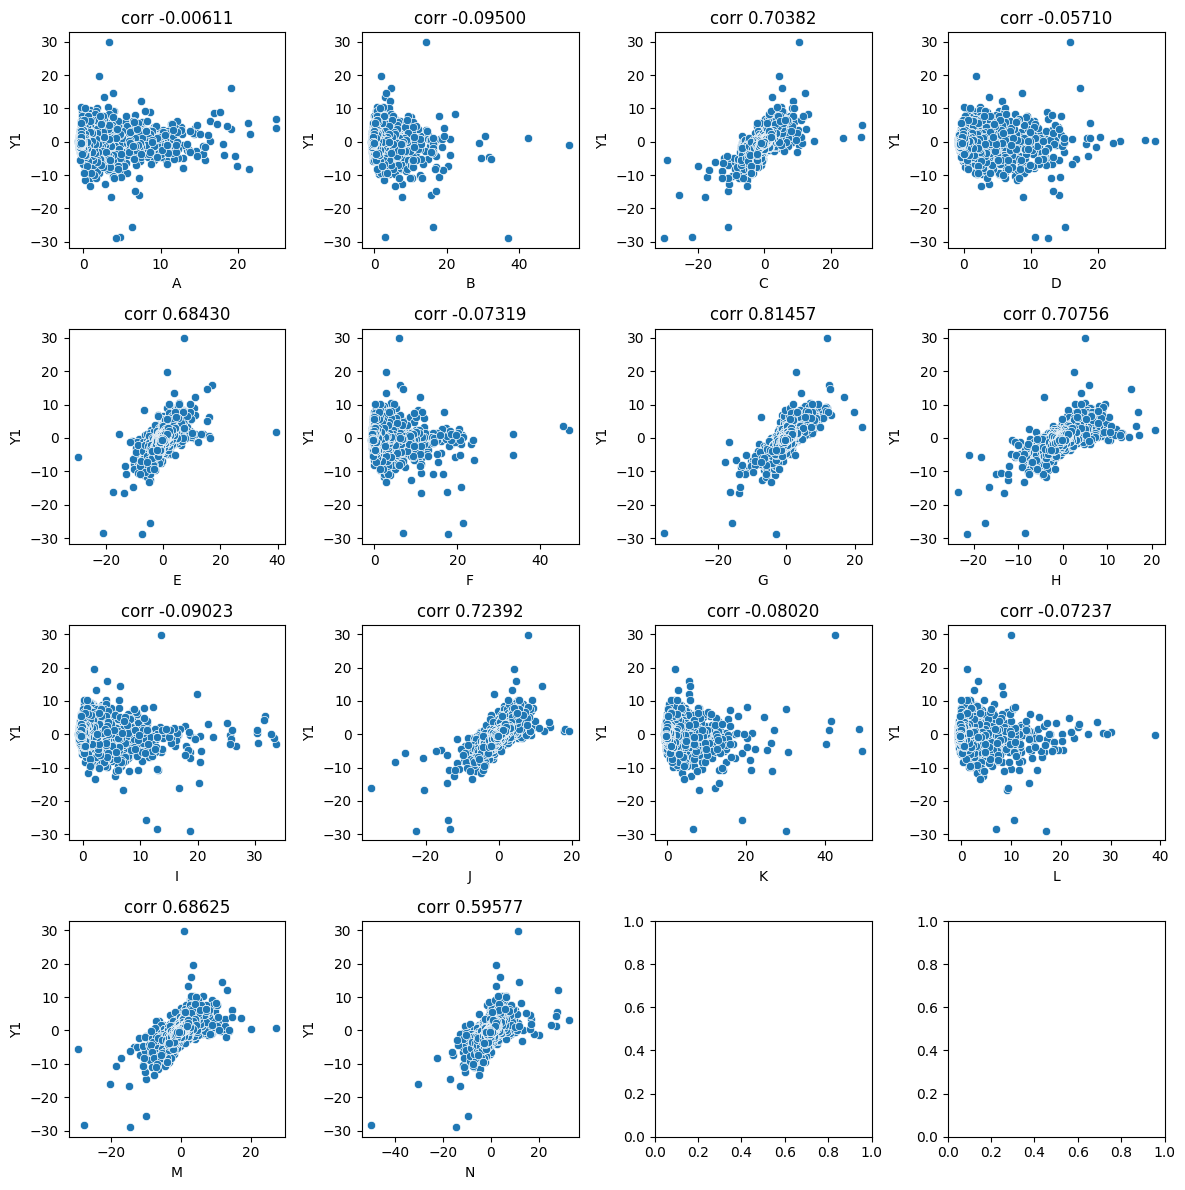

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

features = list(sorted(set(test_data.columns.tolist()) - {"time", "id"}))
n_rows, n_cols = 4,4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))

high_corr_feats = []
HIGH_CORR_THRESHOLD = 0.1
TARGET = "Y1"

for feat, ax in zip(features,axes.flatten()):
    corr = train_data[feat].corr(train_data[TARGET])
    sns.scatterplot(data=train_data, x=feat, y=TARGET, ax=ax)
    ax.set_title(f"corr {corr:.5f}")
    if abs(corr) > HIGH_CORR_THRESHOLD:
        high_corr_feats.append(feat)

print(high_corr_feats)
plt.tight_layout()

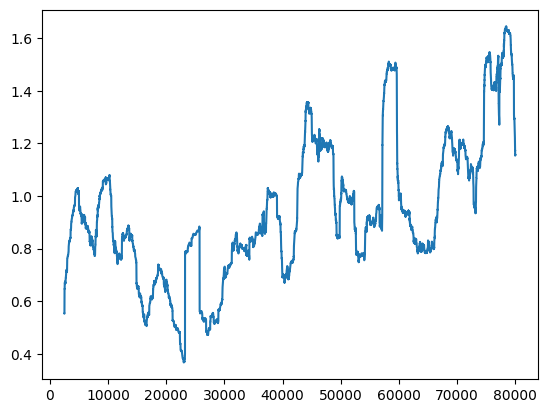

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
y = train_data[TARGET].rolling(window=2500).std().dropna()
plt.plot(y)
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error

X = train_data[features]
y = train_data[TARGET]

CUTOFF = int(len(X) * 0.8)

x_train, y_train = X.iloc[:CUTOFF], y.iloc[:CUTOFF]
x_test, y_test = X.iloc[CUTOFF:], y.iloc[CUTOFF:]

model = LinearRegression(fit_intercept=True)
# model = LGBMRegressor()
model.fit(x_train, y_train)


print("Train")
pred = model.predict(x_train)
print(r2_score(y_train, pred), mean_squared_error(y_train, pred))

print("Test")
pred = model.predict(x_test)
print(r2_score(y_test, pred), mean_squared_error(y_test, pred))

Train
0.6282588616809786 0.2519702205266613
Test
0.5568966966398685 0.6557501085386302
